# K-Means Application : Image Segmentation

Image segmentation is the process of partitioning a digital image into multiple distinct regions 
containing each pixel with similar attributes i.e. classification of an image into different groups. 
There are different methods, and one of the most popular methods is the k-means clustering 
algorithm. K-Means clustering algorithm is an unsupervised algorithm, and it is used to 
segment the interest area from the background.

### OBJECTIVE:
Take a bright colorful image (Eg: image having fruits in it) and implement image segmentation 
using K-Means. You can first try to implement K-Means on iris dataset to understand its 
working and then extend the same logic, using the image pixels as the data points. Hint: All 
the K centroids will represent a color and therefore, you can initialize all the pixels to belong 
to a cluster randomly and then start the training of the centroids

### STEPS:
- Importing libraries
- Read the image file and convert it to NumPy Array
- Assign random labels to individual pixels
- Define function to generate the initial mean values from initial labels
- Update labels by comparing distances with previous mean values and generate new labels
- Generate new mean values from the updated labels
- Run the K-Means Algorithm and obtain the final labels and means
- Use the finally obtained mean and labels to segment the image

### Import the necessary libraries

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

### Read the image file and convert it to NumPy Array

In [2]:
def ReadImage(img_file):
    img_arr = mpimg.imread(img_file)
    plt.imshow(img_arr)
    return(img_arr)

(553, 830, 3)
(553, 830)


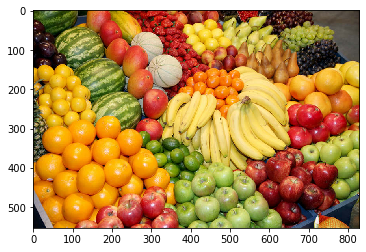

In [3]:
image_arr = ReadImage("./fruits.jpg")
print(image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print(label_arr.shape)

###  Assign random labels to individual pixels 

In [4]:
K = 7 ## K is the number of clusters that we want to create 

for i in range(label_arr.shape[0]):
    for j in range(label_arr.shape[1]):
        label_arr[i,j] = np.random.choice(K)
print(label_arr)

[[4. 3. 5. ... 4. 0. 2.]
 [5. 0. 1. ... 4. 5. 6.]
 [4. 4. 2. ... 6. 3. 1.]
 ...
 [1. 2. 4. ... 1. 0. 3.]
 [5. 3. 0. ... 3. 0. 0.]
 [2. 0. 1. ... 4. 6. 1.]]


### Define the $p^{th}$ order distance metric

The Minkowski distance of order $p$ (where $p$ is an integer) between two points

$X=(x_{1},x_{2},\ldots ,x_{n})$ and $Y=(y_{1},y_{2},\ldots ,y_{n})$ $\in \mathbb {R} ^{d}$ is defined as:

$$ D\left(X,Y\right)=\left(\sum _{i=1}^{d}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}} $$

In [5]:
def dist_p(vec1,vec2,p):  # Generalised Distance Formula
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**p
    distance = s1**(1/p)
    return(distance)

### Define function to generate the initial mean values from initial labels

In [6]:
def init_mean(K,img_arr,label_arr):
    mean_ls = [] ## List containing mean values of the clusters
    pixel_ls = [[] for k in range(K)] ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k:  ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K): 
        pixel_mat = np.matrix(pixel_ls[k])
        mean_k = np.mean(pixel_mat,axis=0)
        mean_ls.append(np.ravel(mean_k))
    return(mean_ls)    

### Update labels by comparing distances with previous mean values and generate new labels

In [7]:
def label_update(prev_mean,img_arr,label_arr,p):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = [] 
            for k in range(len(prev_mean)):
                dist = dist_p(img_arr[i,j,:],prev_mean[k],p) ## Calculate the distance of the pixel at [i,j] with the kth mean
                dist_ls.append(dist) ## Put the distance values in a list
            dist_arr = np.array(dist_ls) ## Convert it to a NumPy array
            new_label = np.argmin(dist_arr) ##The new_label of the point is the one which is closest to the pixel at [i,j]
            label_arr[i,j] = new_label ## Set the new label
    return(label_arr)

### Generate new mean values from the updated labels

In [8]:
def mean_from_label(K,prev_mean,img_arr,label_arr):
    pixel_ls = [[] for k in range(K)]  ## Create list of empty lists to store pixels belonging to a certain cluster
    
    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k: ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value
                    
    for k in range(K):
        if len(pixel_ls[k]) != 0:  ## Only update the means of those clusters which has received at least one new point, else retain the old mean value
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            prev_mean[k] = np.ravel(mean_k)
    new_mean = prev_mean
    return(new_mean)    

### Run the K-Means Algorithm and obtain the final labels and means

In [9]:
def KMeans(img_arr,label_arr,K,p,maxIter):
    mean_old = init_mean(K,img_arr,label_arr)
    for t in range(maxIter):
        new_label_arr = label_update(mean_old,img_arr,label_arr,p)
        mean_new = mean_from_label(K,mean_old,img_arr,new_label_arr)
        print("The mean obtained at {}th iteration is {}\n".format(t,mean_new))
        label_arr = new_label_arr ## Update the label array
        mean_old = mean_new ## Update the mean values
    return(mean_new,label_arr)

In [10]:
mean_final,label_final = KMeans(image_arr,label_arr,K,2,5)

The mean obtained at 0th iteration is [array([204.27452073, 108.16612795,   7.21193714]), array([78.6535579 , 81.90542653, 42.24366271]), array([237.88740272, 177.70177173,  60.07977778]), array([207.96698427,  67.51096831,  54.53622867]), array([125.02652532,  40.70561368,  13.69357776]), array([184.29285714,  40.70462185,  34.68151261]), array([186.05010244, 186.11675048, 106.71602409])]

The mean obtained at 1th iteration is [array([207.49969568, 124.81876601,  11.26962873]), array([69.51742651, 74.35595119, 36.30606767]), array([239.63752848, 183.3000988 ,  52.3081638 ]), array([209.63738261,  81.78030227,  63.00578949]), array([110.95654154,  24.67047797,  11.10808284]), array([179.56775043,  40.06568409,  28.38320594]), array([197.33495964, 189.078412  , 111.71146497])]

The mean obtained at 2th iteration is [array([205.55061898, 132.37740373,  14.3106865 ]), array([68.66841292, 74.56604894, 36.91748634]), array([240.00713027, 183.83858542,  44.10810146]), array([208.09645154,  9

### Use the finally obtained mean and labels to segment the image

In [11]:
def segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2]))
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8)
    plt.imshow(seg_image)

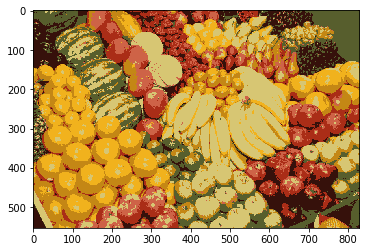

In [12]:
segmentImage(image_arr,label_final,mean_final)